## Bollinger Bands

Bollinger Bands represent a key technical trading tool for financial traders. Bollinger bands are plotted by two (2) standard deviations (a measure of volatility) away from the moving average of a price. Bollinger Bands allow traders to monitor and take advantage of shifts in price volatilities. This provides a **95% confidence interval** that shows the predicted price will face under the given interval.

Main Components of a Bollinger Bands

Upper Band: The upper band is simply two standard deviations above the moving average of a stock’s price.
    
Middle Band: The middle band is simply the moving average of the stock’s price.
    
Lower Band: Two standard deviations below the moving average is the lower band.

In [1]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

In [2]:
# Make function for calls to Yahoo Finance
def get_adj_close(ticker, start, end):
    '''
    A function that takes ticker symbols, starting period, ending period
    as arguments and returns with a Pandas DataFrame of the Adjusted Close Prices
    for the tickers from Yahoo Finance
    '''
    start = start
    end = end
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)

In [5]:
# Get Adjusted Closing Prices for TSM between 2012-2022
TSM = get_adj_close('TSM', '30/09/2012', '30/09/2022')

In [6]:
TSM

,Adj Close
Date,
2012-10-01,11.899858
2012-10-02,11.974702
2012-10-03,12.012121
2012-10-04,12.094449
2012-10-05,12.027091
...,...
2022-09-26,73.010002
2022-09-27,73.029999
2022-09-28,72.129997


In [7]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
TSM['30 Day MA'] = TSM['Adj Close'].rolling(window=20).mean()
TSM['30 Day STD'] = TSM['Adj Close'].rolling(window=20).std()
TSM['Upper Band'] = TSM['30 Day MA'] + (TSM['30 Day STD'] * 2)
TSM['Lower Band'] = TSM['30 Day MA'] - (TSM['30 Day STD'] * 2)

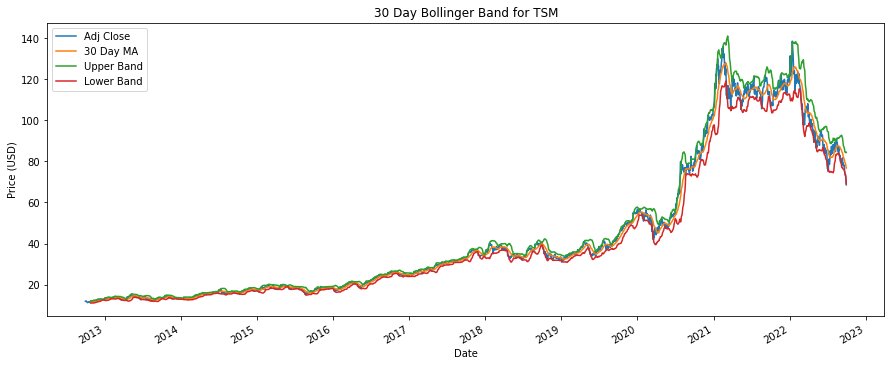

In [8]:
# Simple 30 Day Bollinger Band for TSM (2012-2022)
TSM[['Adj Close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(15,6))
plt.title('30 Day Bollinger Band for TSM')
plt.ylabel('Price (USD)')
plt.show()

No handles with labels found to put in legend.


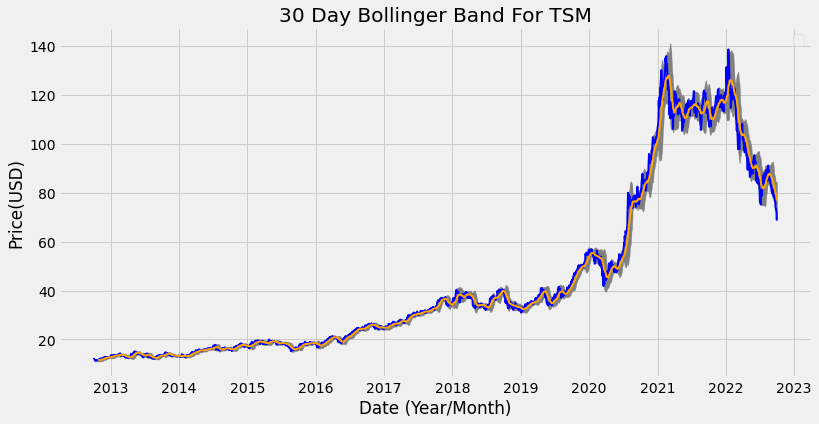

In [10]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for Pfizer DataFrame
x_axis = TSM.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Pfizer
ax.fill_between(x_axis, TSM['Upper Band'], TSM['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, TSM['Adj Close'], color='blue', lw=2)
ax.plot(x_axis, TSM['30 Day MA'], color='orange', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For TSM')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()